# Computing embeddings from multiview data using Partial Least Squares Regression

In [1]:
from mvlearn.datasets import load_UCImultifeature
from mvlearn.embed import pls
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Load Data
For this example, we will use the UCI multiview data set

In [2]:
# Load full dataset, labels not needed
Xs, y = load_UCImultifeature()

## Embed
Partial Least Squares (PLS) regression computes an embedding as part of regressing an $\textbf{X}$ matrix onto a $\textbf{Y}$ target matrix. We can view these as two separate views and calculate and embedding of the first view based on a regression fit to the second view features.

In [16]:
# Embed the first view
X = Xs[0]
# Calculate best embedding
Xhat = pls.partial_least_squares_embedding(X, Y, n_components=2)

In [13]:
# Regression target is the second view
Y = np.zeros((Xs[0].shape[0], 10))
for i,cls in enumerate(y):
    Y[i,int(cls)] = 1

In [17]:
# Extract first two components to view
component_1 = Xhat[:,0]
component_2 = Xhat[:,1]

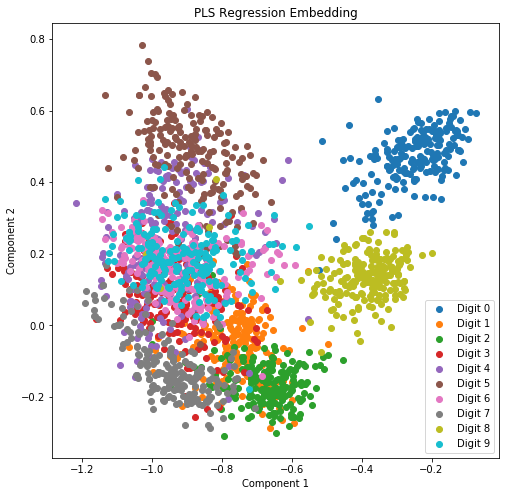

In [18]:
fig, ax = plt.subplots(figsize=(8,8))
for g in np.unique(y):
    i = np.where(y == g)
    ax.scatter(component_1[i], component_2[i], label=f'Digit {int(g)}')
ax.legend()
plt.title('PLS Regression Embedding')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()